In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# **Exercício 1:**
### **Desenvolvimento do algoritmo de diferenças finitas e funções de condicão inicial**



1.   ## **Algoritmo**



In [ ]:

def onda(x0, xmax, tmax, Nx, Nt, vetor_t_especifico, velocidade_prop, condicao_inicial_x, condicao_inicial_t):
    #Definimos a malha de x e a malha de t, respectivamente:
    malha_x = np.linspace(x0, xmax, Nx)
    malha_t = np.linspace(0, tmax, Nt)

    #Aqui calculamos a distância entre dois pontos na malha x e na malha t, respectivamente:
    dx = (xmax - x0)/(Nx - 1)
    dt = tmax/(Nt - 1)

    u = np.zeros((Nx, Nt)) #inicializacao da matriz solucao

    u[:,0] = condicao_inicial_x(malha_x, u)

    u[:,1] = condicao_inicial_t(malha_t, u)

    C = ((dt**2)/(dx**2)) * velocidade_prop**2

    for n in range(1, Nt - 1):
        for i in range(1, Nx - 1):
            u[i, n + 1] = 2 * u[i, n] - u[i, n - 1] + C  * (u[i + 1, n] - 2 * u[i, n] + u[i - 1, n])

    u[0, :] = 0
    u[Nx - 1, :] = 0

    for t in vetor_t_especifico:
        indice = np.argmin(np.abs(malha_t - t))
        plt.plot(malha_x, u[:, indice])
        plt.xlabel('Espaço (m)')
        plt.ylabel('u(x,t)')
        plt.title(f'Onda no tempo t = {malha_t[indice]:.1f} s')
        plt.show()






2.   ## **Condições Iniciais**

Coloque as condições iniciais desejadas

In [ ]:
def condicao_inicial_x(x, u):
    condicao_x = np.exp(-(x)**2)

    return (condicao_x)

def condicao_inicial_t(t, u):
    condicao_t = u[ :, 0]

    return (condicao_t)



3. ## **Exemplo de implementação**

Neste exemplo será implementada uma onda numa malha com x0 = -7 m e xmax = 7 m e numa malha com tmax = 10 s. Além disso, as condições iniciais serão as da seção acima e v = 1 m/s!



4. ## **Seção de implementação**  

Implemente a função { onda() } com os parâmetros específicos desejados


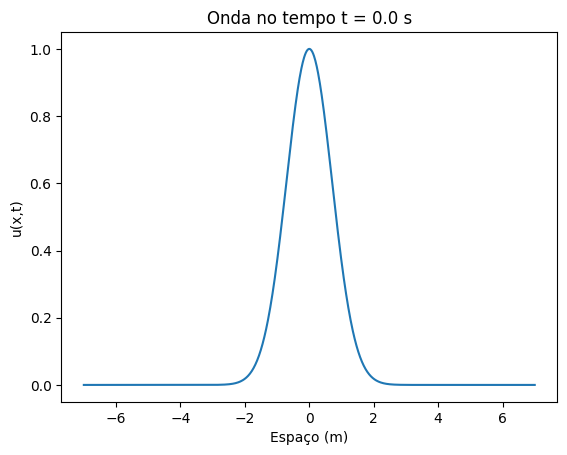

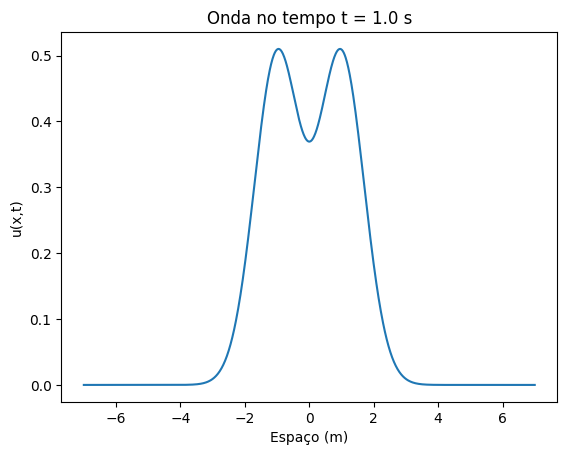

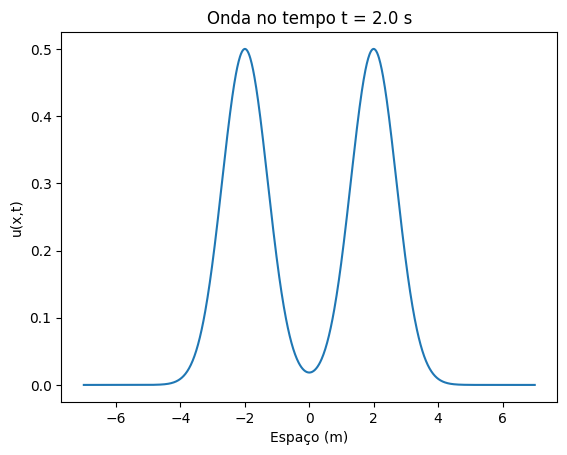

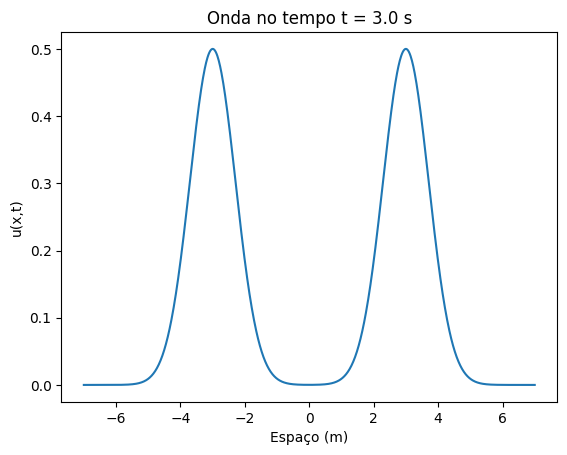

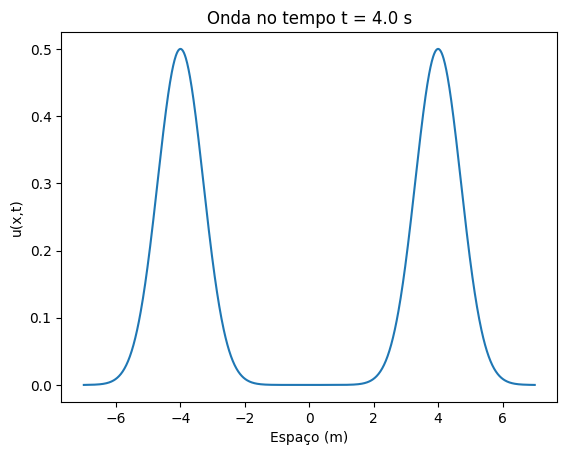

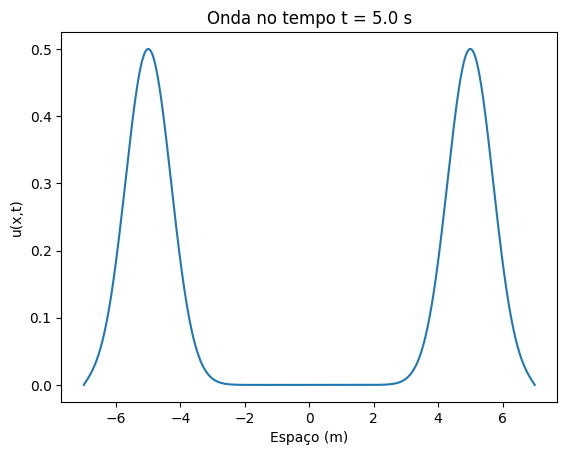

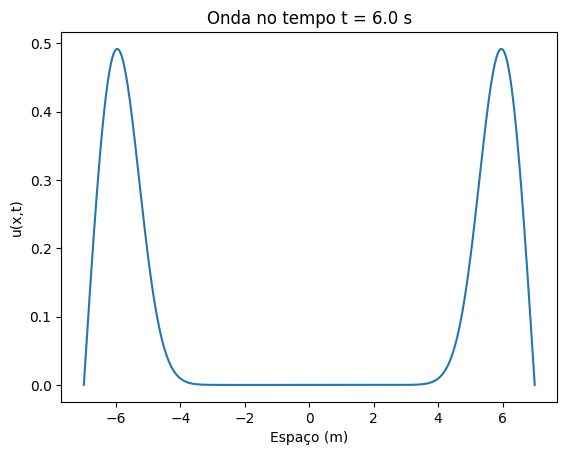

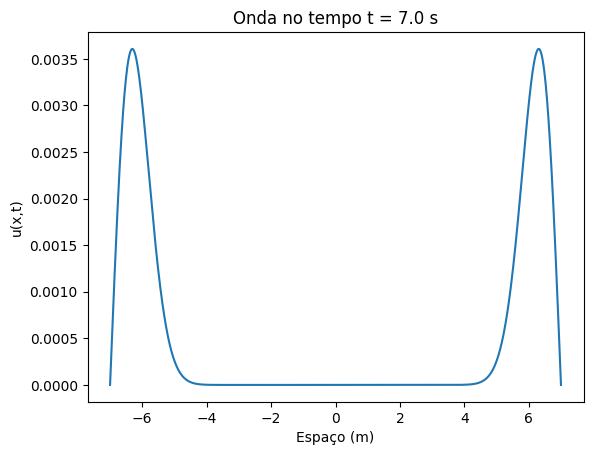

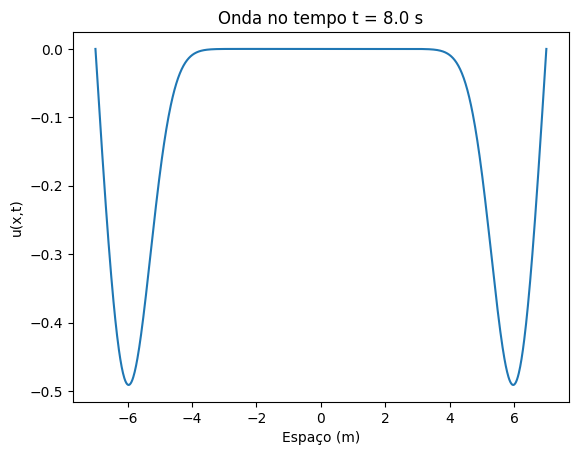

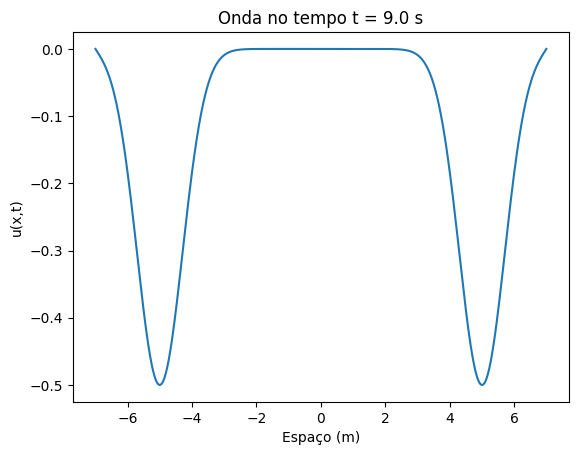

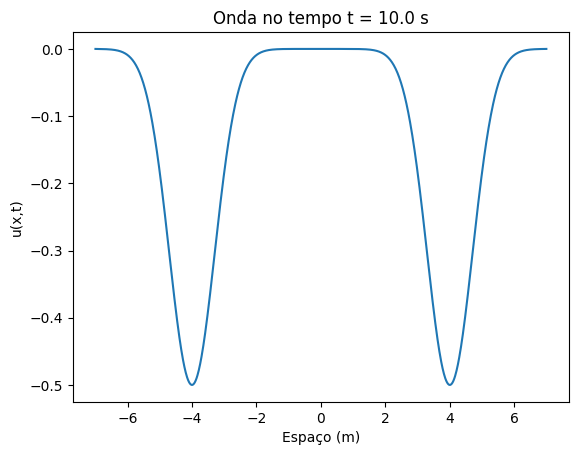

In [ ]:
onda(-7, 7, 10, 1000, 2000, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 1, condicao_inicial_x, condicao_inicial_t)

# **Exercício 2: Plot e análise da onda em tempos específicos**

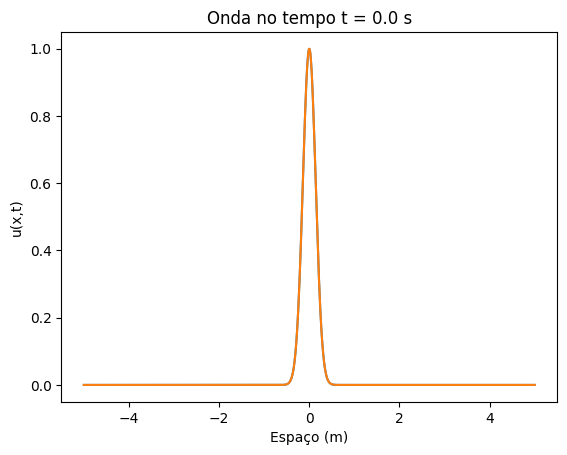

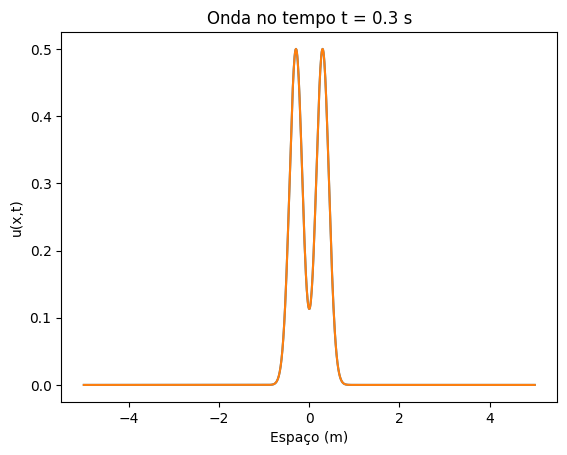

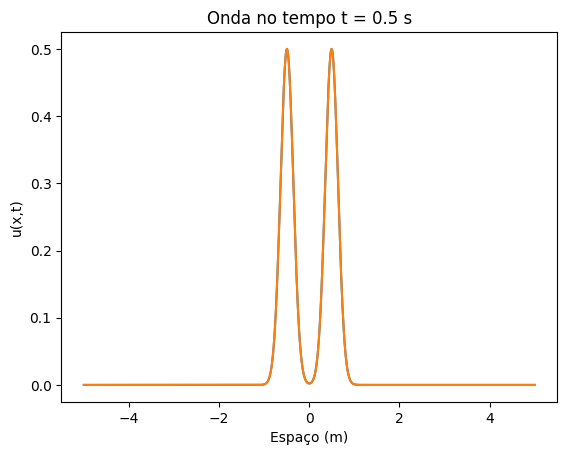

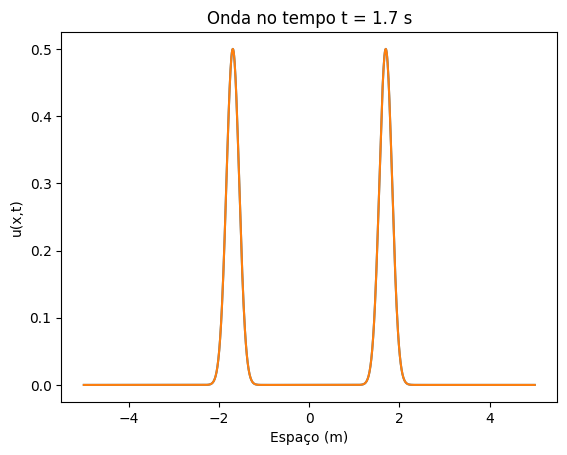

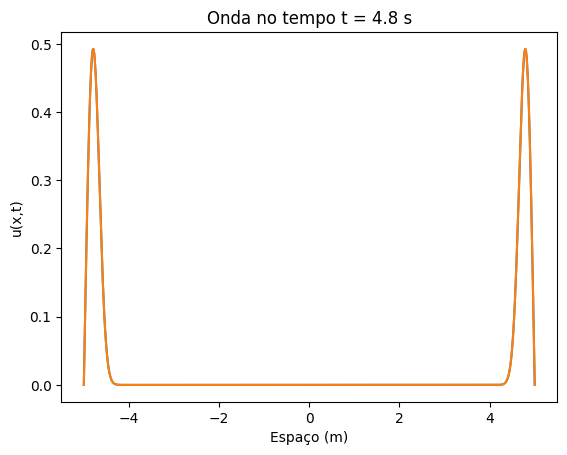

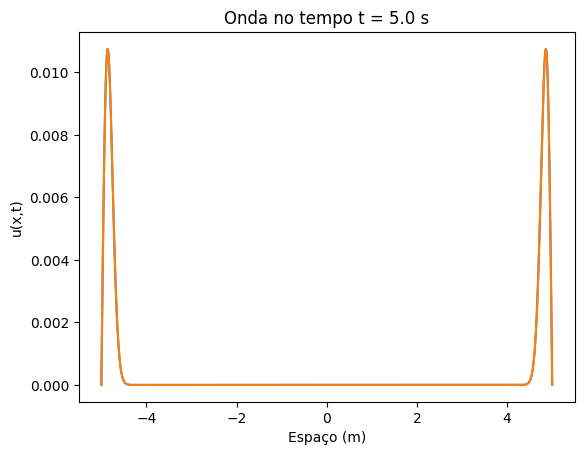

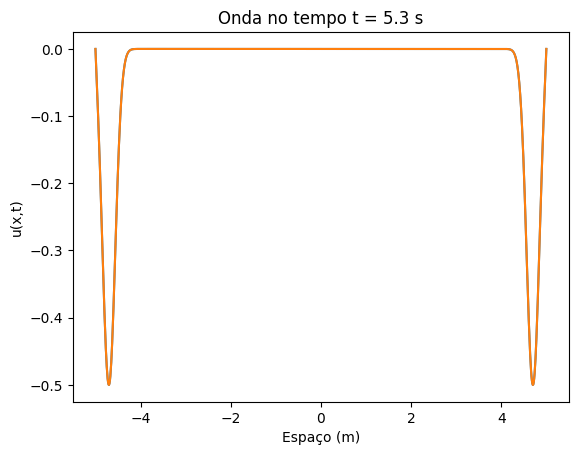

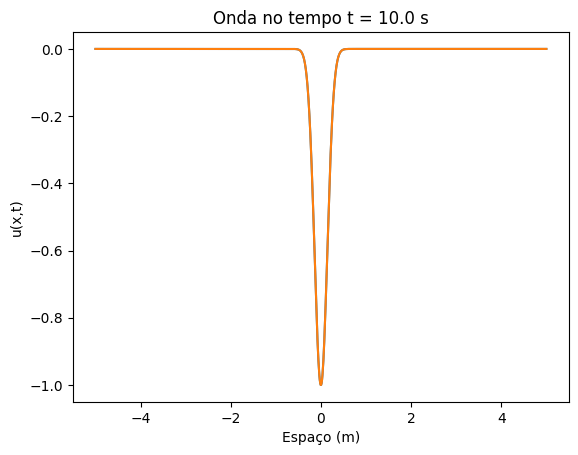

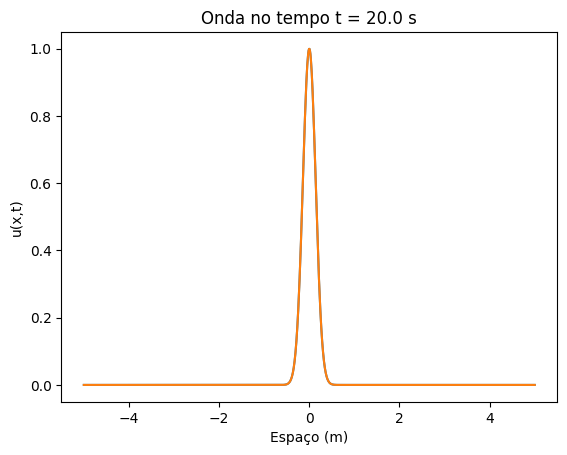

In [ ]:

velocidade = 1
xmin = -5
xmax = 5
tmax = 20
tempos = [0, 0.3, 0.5, 1.7, 4.8, 5.0, 5.3, 10, 20]
Nx = 1000
Nt = 2000

dx = (xmax - xmin)/(Nx-1)
dt = tmax/(Nt-1)

malha_x = np.linspace(xmin, xmax, Nx)
malha_t = np.linspace(0, tmax, Nt)

u = np.zeros((Nx, Nt))

C = ((dt**2)/(dx**2)) * velocidade**2

u[:, 0] = np.exp(-((malha_x/0.2))**2)
u[:, 1] = u[:, 0]


for n in range(1, Nt - 1):
    for i in range(1, Nx - 1):
        u[i, n + 1] = 2 * u[i, n] - u[i, n - 1] + C * (u[i + 1, n] - 2 * u[i, n] + u[i - 1, n])

u[0, :] = 0
u[Nx - 1, :] = 0

for t_especifico in tempos:
    indice = np.argmin(np.abs(malha_t - t_especifico))
    plt.plot(malha_x, u[:, indice])
    plt.plot(malha_x, u[:, indice])
    plt.xlabel('Espaço (m)')
    plt.ylabel('u(x,t)')
    plt.title(f'Onda no tempo t = {malha_t[indice]:.1f} s')
    plt.show()



# Análise Gráfica

A partir da análise gráfica observa-se que, ao longo do tempo, desprendem-se dois picos de onda, um para a esquerda e outro para a direita, que no tempo t = 0 s estavam superpostos. É possível observar também que há reflexão da onda nos pontos de espaço x = -5 e x = 5 metros, como mostra o gráfico da onda em t = 5 s (já que a onda percorre a uma velocidade de 1 m/s). Analisando o gráfico da onda em t = 5 s, pode ser observada sua amplitude (positiva) diminuindo e se aproximando do zero pois, com a reflexão, a onda passa a ter amplitude negativa (até a próxima reflexão). Reiterando, portanto, Visualiza-se que após cada reflexão inverte-se o sinal do valor da amplitude (nesse intervalo de tempo, de 0 a 20 segundos, há 2 reflexões sendo uma em 5 segundos e a outra em 15 segundos de propagação). E finalmente, é importante notar também que nos tempos t = 10 e t = 20 as ondas, que se separaram na origem no começo da propagação, se encontram e se interferem de maneira construtiva, somando seus picos e assim dobrando suas amplitudes.   